## **Download Important Libraries**

In [1]:
!pip install spark

In [2]:
import pyspark
print(pyspark.__version__)

4.0.1


## **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql import Row
import collections
from pyspark import SparkConf,SparkContext

# Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv("data/churn.csv")

In [5]:
df.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [6]:
df.tail()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
895,895,Paul Miller,42.0,12800.82,1,3.62,8.0,0
896,896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,0
897,897,Ana Smith,45.0,12056.18,0,5.46,4.0,0
898,898,Justin Leonard,51.0,6517.93,1,5.47,10.0,0
899,899,Joseph Williams,39.0,9315.60,1,5.02,10.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    float64
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    float64
 7   Churn            900 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 56.4+ KB


In [8]:
df.nunique()

Unnamed: 0         900
Names              899
Age                 36
Total_Purchase     900
Account_Manager      2
Years              418
Num_Sites           12
Churn                2
dtype: int64

In [9]:
df.shape

(900, 8)

In [10]:
df.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900.0,449.500000,259.951919,0.0,224.7500,449.500,674.250,899.00
Age,900.0,41.816667,6.127560,22.0,38.0000,42.000,46.000,65.00
Total_Purchase,900.0,10062.824033,2408.644532,100.0,8497.1225,10045.870,11760.105,18026.01
Account_Manager,900.0,0.481111,0.499921,0.0,0.0000,0.000,1.000,1.00
Years,900.0,5.273156,1.274449,1.0,4.4500,5.215,6.110,9.15
Num_Sites,900.0,8.587778,1.764836,3.0,7.0000,8.000,10.000,14.00
Churn,900.0,0.166667,0.372885,0.0,0.0000,0.000,0.000,1.00


In [12]:
df.count()

Unnamed: 0         900
Names              900
Age                900
Total_Purchase     900
Account_Manager    900
Years              900
Num_Sites          900
Churn              900
dtype: int64

In [13]:
df.corr(numeric_only=True)

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Unnamed: 0,1.000000,-0.037801,-0.018938,-0.067247,-0.143873,-0.378287,-0.645498
Age,-0.037801,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.018938,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.067247,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,-0.143873,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.378287,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,-0.645498,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


## Data Visualization

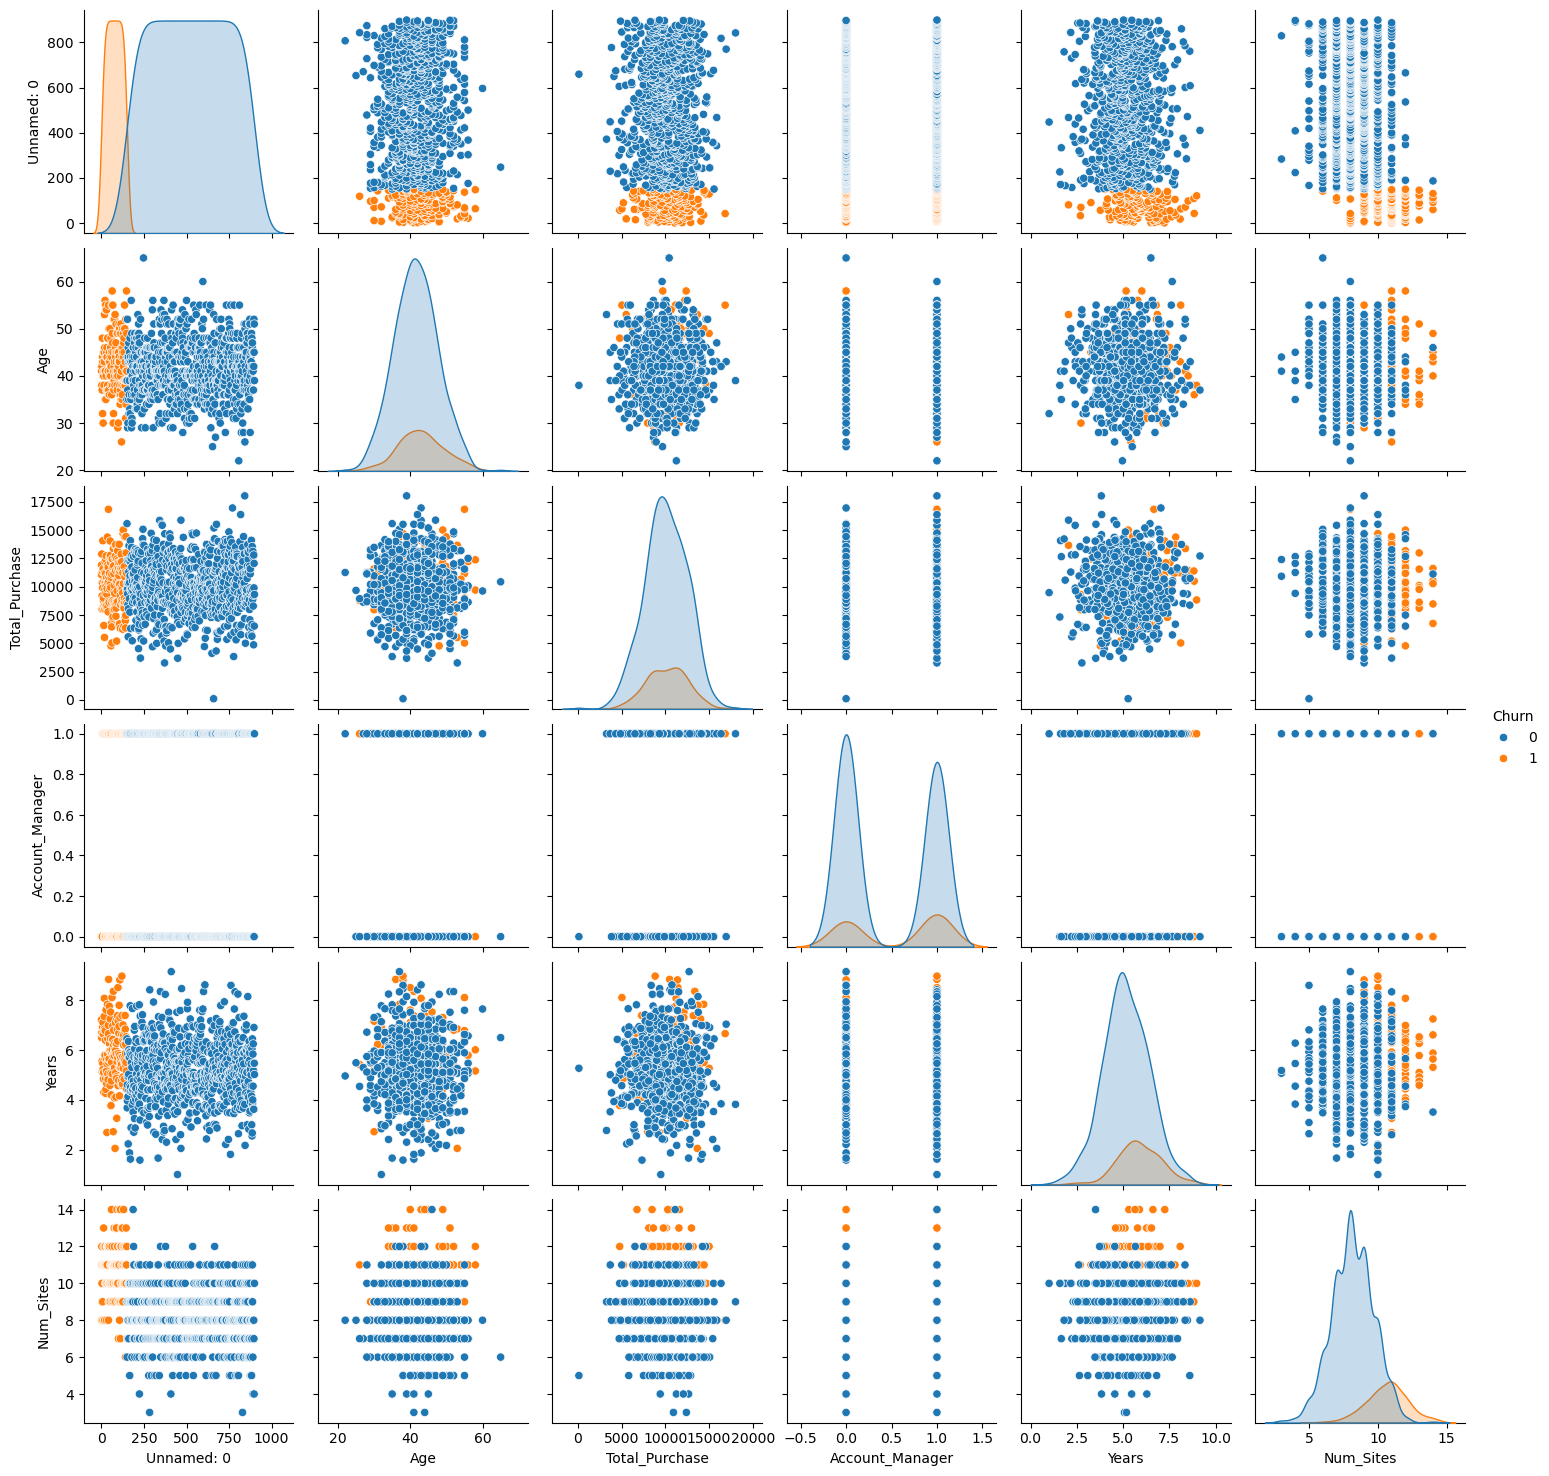

In [14]:
sns.pairplot(df,hue="Churn");


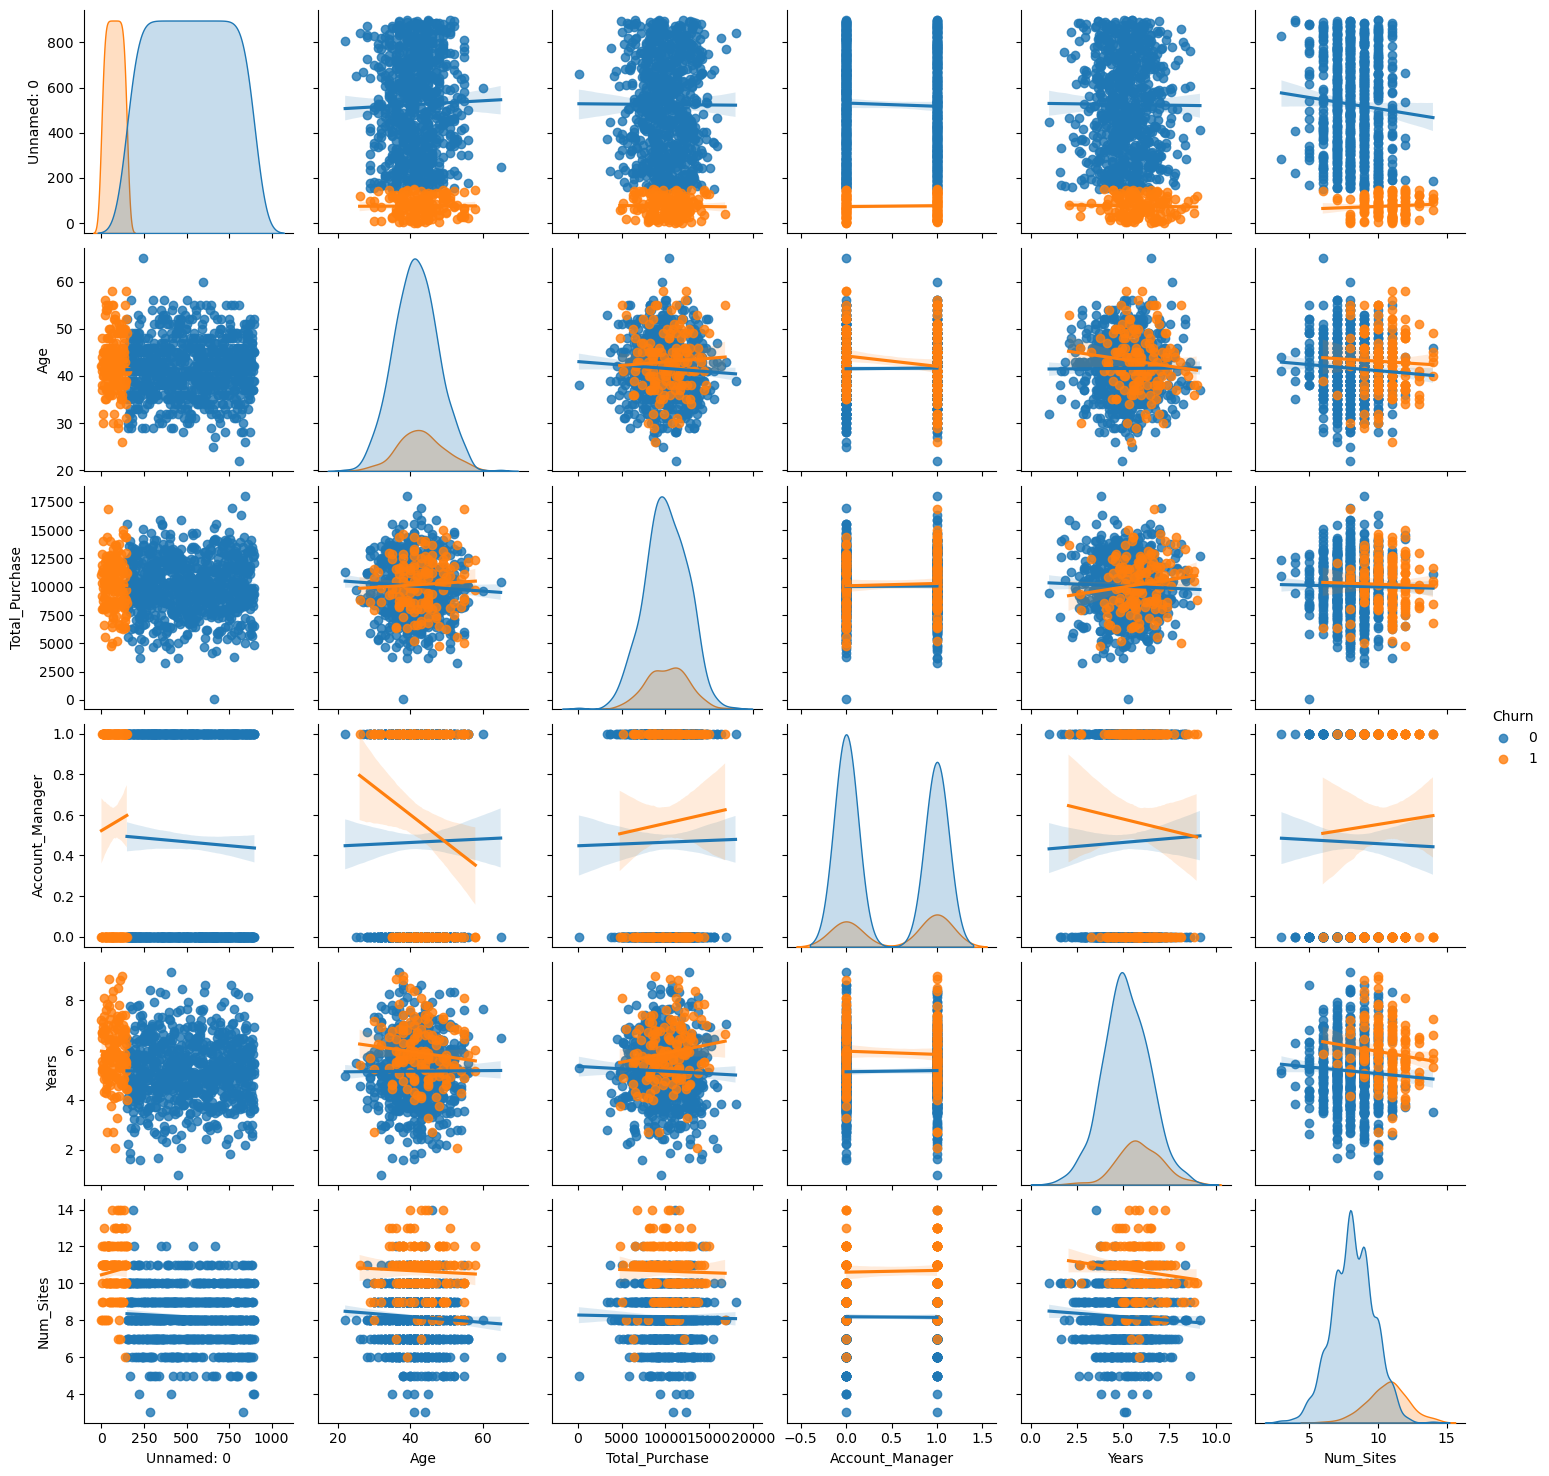

In [15]:
sns.pairplot(df,hue="Churn", kind="reg");


<Axes: >

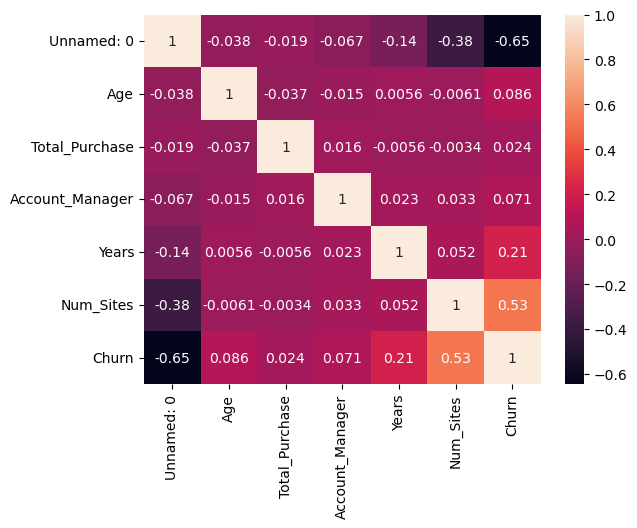

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

## Feature Engineering

In [17]:
df.drop(['Unnamed: 0','Names'],axis=1,inplace=True)

In [18]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


In [19]:
 df['Account_Manager']=df['Account_Manager'].astype(float)
 df['Churn']=df['Churn'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    float64
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


# Pyspark

In [21]:
from __future__ import print_function
spark=SparkSession.builder.getOrCreate()
inputlines=df = spark.read.options(header = True, inferSchema = True).csv("data/churn.csv")
inputlines

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [22]:
df=inputlines.rdd.map(lambda x: x.split(","))

In [23]:
df

PythonRDD[15] at RDD at PythonRDD.scala:56

In [24]:
col=['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Churn']
df1 = inputlines
df1

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [25]:
from  pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=['Age','Total_Purchase','Account_Manager','Years','Num_Sites'], outputCol="features")
df1= vecAssembler.transform(df1)
df1

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int, features: vector]

In [26]:
df1 = df1.drop("index",'Names', 'Age','Total_Purchase','Account_Manager','Years','Num_Sites')
df1

DataFrame[_c0: int, Churn: int, features: vector]

In [27]:
df1 = df1.withColumnRenamed("Churn", "label")
df1.head()

Row(_c0=0, label=1, features=DenseVector([42.0, 11066.8, 0.0, 7.22, 8.0]))

In [28]:
df1.show()

+---+-----+--------------------+
|_c0|label|            features|
+---+-----+--------------------+
|  0|    1|[42.0,11066.8,0.0...|
|  1|    1|[41.0,11916.22,0....|
|  2|    1|[38.0,12884.75,0....|
|  3|    1|[42.0,8010.76,0.0...|
|  4|    1|[37.0,9191.58,0.0...|
|  5|    1|[48.0,10356.02,0....|
|  6|    1|[44.0,11331.58,1....|
|  7|    1|[32.0,9885.12,1.0...|
|  8|    1|[43.0,14062.6,1.0...|
|  9|    1|[40.0,8066.94,1.0...|
| 10|    1|[30.0,11575.37,1....|
| 11|    1|[45.0,8771.02,1.0...|
| 12|    1|[45.0,8988.67,1.0...|
| 13|    1|[40.0,8283.32,1.0...|
| 14|    1|[41.0,6569.87,1.0...|
| 15|    1|[38.0,10494.82,1....|
| 16|    1|[45.0,8213.41,1.0...|
| 17|    1|[43.0,11226.88,0....|
| 18|    1|[53.0,5515.09,0.0...|
| 19|    1|[46.0,8046.4,1.0,...|
+---+-----+--------------------+
only showing top 20 rows


In [29]:
trainTestSplit=df1.randomSplit([0.5,0.5])
train=trainTestSplit[0]
test=trainTestSplit[1]
train

DataFrame[_c0: int, label: int, features: vector]

In [30]:
test

DataFrame[_c0: int, label: int, features: vector]

# GBT Classifier

In [31]:
gbt=GBTClassifier(featuresCol='features',maxIter=10)
gbt = gbt.fit(train)

In [32]:
predictions = gbt.transform(test)
predictions.show()

+---+-----+--------------------+--------------------+--------------------+----------+
|_c0|label|            features|       rawPrediction|         probability|prediction|
+---+-----+--------------------+--------------------+--------------------+----------+
|  0|    1|[42.0,11066.8,0.0...|[1.35205074495668...|[0.93726823010827...|       0.0|
|  1|    1|[41.0,11916.22,0....|[-0.1993171101584...|[0.40164052731666...|       1.0|
|  2|    1|[38.0,12884.75,0....|[-1.6255248385724...|[0.03728918698802...|       1.0|
|  3|    1|[42.0,8010.76,0.0...|[0.72808886109640...|[0.81094737111581...|       0.0|
|  5|    1|[48.0,10356.02,0....|[1.32471652408394...|[0.93397603813913...|       0.0|
| 13|    1|[40.0,8283.32,1.0...|[-1.1211979668070...|[0.09600739731588...|       1.0|
| 14|    1|[41.0,6569.87,1.0...|[-0.8178537092717...|[0.16305000146968...|       1.0|
| 15|    1|[38.0,10494.82,1....|[-1.3923314900433...|[0.05815860842049...|       1.0|
| 17|    1|[43.0,11226.88,0....|[0.48042913481276...|[

In [33]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8559322033898306


In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# ROC-AUC (area under ROC)
e_auc = BinaryClassificationEvaluator(
    labelCol="label",
    rawPredictionCol="rawPrediction",   # or probabilityCol if you prefer
    metricName="areaUnderROC"
)
roc_auc = e_auc.evaluate(predictions)

# Accuracy
e_acc = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)
accuracy = e_acc.evaluate(predictions)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


ROC-AUC: 0.8411
Accuracy: 0.8559


In [35]:
e_pr = BinaryClassificationEvaluator(
    labelCol="label",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderPR"
)
pr_auc = e_pr.evaluate(predictions)
print(f"PR-AUC: {pr_auc:.4f}")

PR-AUC: 0.5669


In [36]:
e_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
e_wp = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision"
)
e_wr = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

f1  = e_f1.evaluate(predictions)
wp  = e_wp.evaluate(predictions)
wr  = e_wr.evaluate(predictions)

print(f"F1 (weighted): {f1:.4f}")
print(f"Precision (weighted): {wp:.4f}")
print(f"Recall (weighted): {wr:.4f}")


F1 (weighted): 0.8559
Precision (weighted): 0.8559
Recall (weighted): 0.8559


In [37]:
# counts for (label, prediction)
from pyspark.sql.functions import col

conf = (
    predictions.groupBy(col("label"), col("prediction"))
         .count()
         .orderBy("label", "prediction")
)
conf.show() 

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|  361|
|    0|       1.0|   34|
|    1|       0.0|   34|
|    1|       1.0|   43|
+-----+----------+-----+



In [38]:
conf_pivot = (
    predictions.groupBy(col("label"))
         .pivot("prediction", [0.0, 1.0])
         .count()
         .na.fill(0)
)
conf_pivot.show()


+-----+---+---+
|label|0.0|1.0|
+-----+---+---+
|    1| 34| 43|
|    0|361| 34|
+-----+---+---+

